### ESTATÍSTICA 1: **FREQUENCIAS E MEDIDAS**

In [1]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

## Leitura dos dados

In [2]:
from pydataset import data ### biblioteca q contem diferentes datasets

Vamos primeiramente ler a documentação do dataset em que iremos utilizar

In [3]:
data('Forbes2000', show_doc = True)

Forbes2000

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  The Forbes 2000 Ranking of the World's Biggest Companies (Year 2004)

### Description

The Forbes 2000 list is a ranking of the world's biggest companies, measured
by sales, profits, assets and market value.

### Usage

    data("Forbes2000")

### Format

A data frame with 2000 observations on the following 8 variables.

rank

the ranking of the company.

name

the name of the company.

country

a factor giving the country the company is situated in.

category

a factor describing the products the company produces.

sales

the amount of sales of the company in billion USD.

profits

the profit of the company in billion USD.

assets

the assets of the company in billion USD.

marketvalue

the market value of the company in billion USD.

### Source

http://www.forbes.com, assessed on November 26th, 2004.

### Examples

    data("Forbes2000", package = "HSAUR")
    summary(Forbes2000)


In [4]:
### leitura do dataset forbes que contém os dados
forbes = data('Forbes2000')

In [5]:
forbes.head() ### leitura das 5 primeiras linhas do dataset

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


### Tipos de variáveis

In [6]:
forbes.info() ### verificando quais colunas sao numéricas e quais categóricas.

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         2000 non-null   int64  
 1   name         2000 non-null   object 
 2   country      2000 non-null   object 
 3   category     2000 non-null   object 
 4   sales        2000 non-null   float64
 5   profits      1995 non-null   float64
 6   assets       2000 non-null   float64
 7   marketvalue  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 140.6+ KB


No caso acima, as colunas denotadas por "object" sao categóricas, as colunas int64 assumem valores inteiros e as colunas float64 sao numéricas contínuas

# Análise de tendencia central

Moda: aplicada em todas as variáveis do dataframe

- utilizar a funcao df.mode()
- No caso vamos retirar as 2 primeiras colunas pois elas assumem valores unicos, sao identificadores

In [7]:
forbes.iloc[:, 2:8].mode()

,country,category,sales,profits,assets,marketvalue
0,United States,Banking,0.58,0.13,4.22,1.34


Média e mediana (somente para variáveis numéricas)

In [8]:
forbes[['sales', 'profits', 'assets', 'marketvalue']].mean()

sales           9.697010
profits         0.381133
assets         34.041850
marketvalue    11.877655
dtype: float64

In [9]:
forbes[['sales', 'profits', 'assets', 'marketvalue']].median()

sales          4.365
profits        0.200
assets         9.345
marketvalue    5.150
dtype: float64

A funcao describe acima calcula estatísticas descritivas das variáveis numéricas

In [10]:
forbes.describe()

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000


Nesse caso temos a média e a mediana representada pelo percentil 50%

# Analise de dispersão e outliers

Para a análise de dispersão iremos calcular:
1. Amplitude, desvio padrao e variancia
2. Analisar os histogramas das variaveis
3. Construir o boxplot
4. Verificar outliers


### 1. Amplitude, desvio padrão e variância

In [11]:
### essa funcao: adiciona no describe anterior as colunas de amplitude e variancia.
### a amplitude será o máximo - minimo valor
### a variancia será o desvio padrão ao quadrado
def describe_new(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    df1.loc["variancia"] = df1.loc['std']*df1.loc['std']
    return df1

In [12]:
describe_new(forbes)

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000
amplitude,1999.000000,256.320000,46.790000,1263.760000,328.520000
variancia,333500.000000,324.093331,3.116828,9935.860339,598.301217


A maior amplitude ou discrepancia das empresas listadas na forbes 2000 é relacionada aos ativos da empresa, os assets, conforme podemos ver. Essa também é a variavel com maior desvio padrão .(nao iremos considerar a variável ranking, pois nesse caso ela seria como o nosso ID da empresa)

### Histograma das variáveis

<Figure size 800x1000 with 0 Axes>

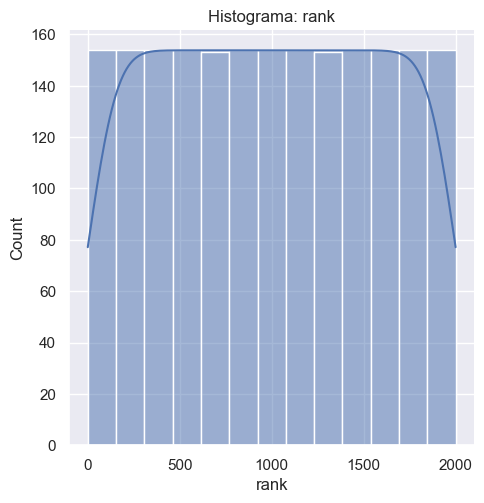

<Figure size 800x1000 with 0 Axes>

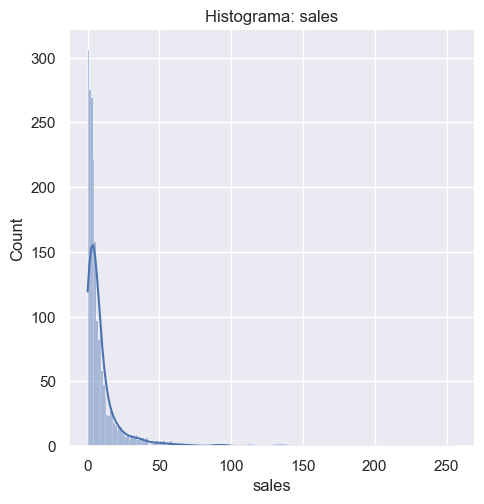

<Figure size 800x1000 with 0 Axes>

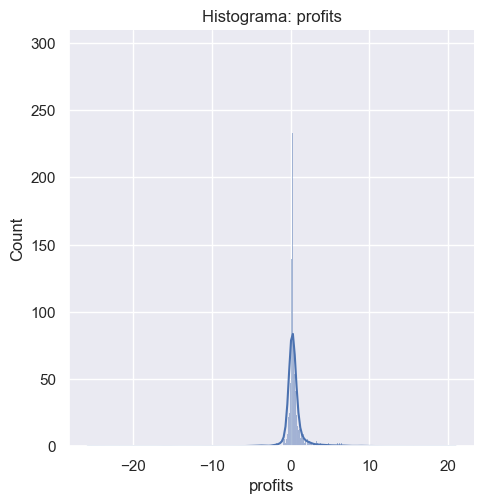

<Figure size 800x1000 with 0 Axes>

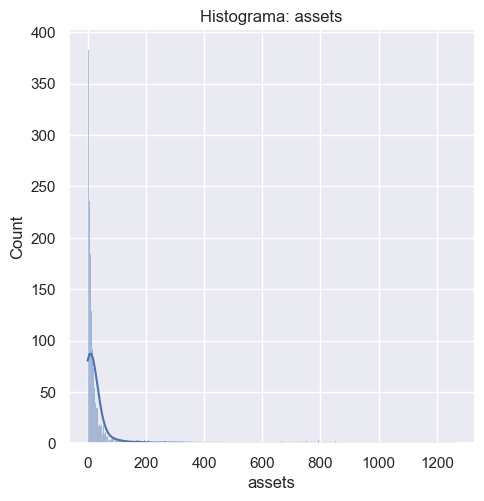

<Figure size 800x1000 with 0 Axes>

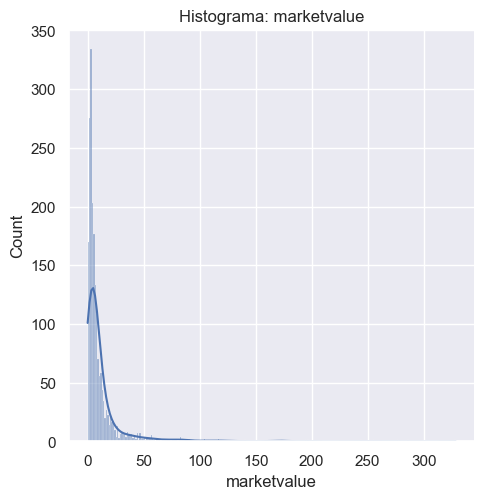

In [13]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
# create distplots
for column in forbes.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = forbes , x = column, kde= True)
    plt.title("Histograma: "+column)

### Boxplot das variáveis

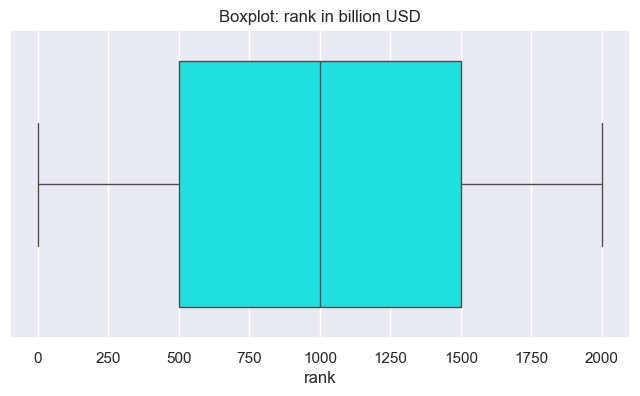

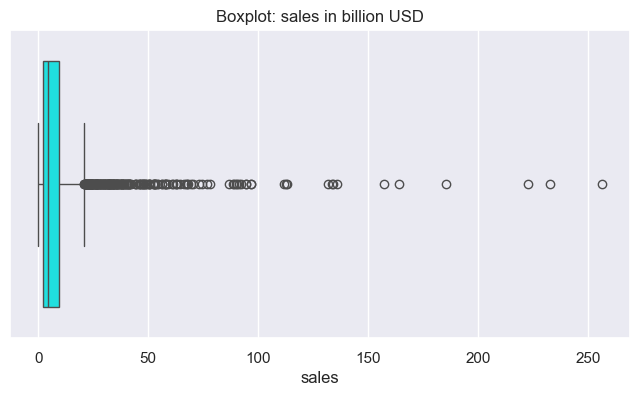

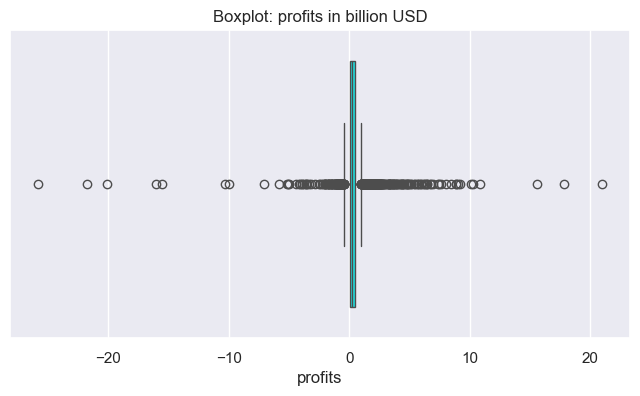

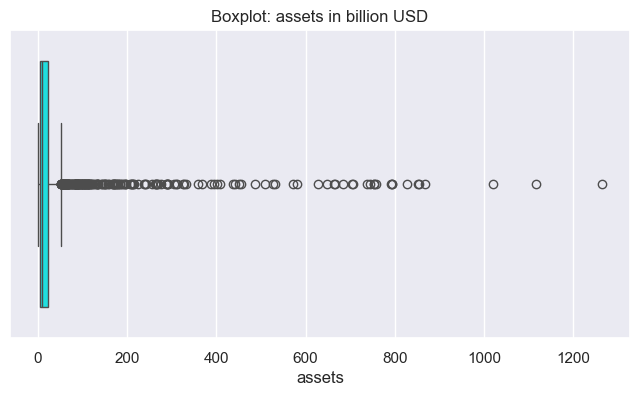

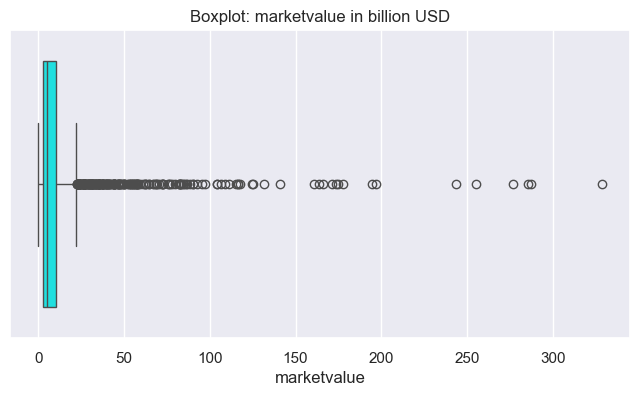

In [14]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
### para cada uma das colunas numericas roda o boxplot
for column in forbes.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = forbes , x = column, color='cyan',showfliers=True)
    plt.title("Boxplot: "+column + " in billion USD")

Nota-se a grande quantidade de outliers expressadas pelos pontinhos nos gráficos de caixa, o que dificultou bastante a visualizacao dos dados

Para fazermos os boxplots sem considerar os outliers podemos rodar a mesma funçao porem com o parametro showfliers = False, assim ficará mais facil a analise dos resultados

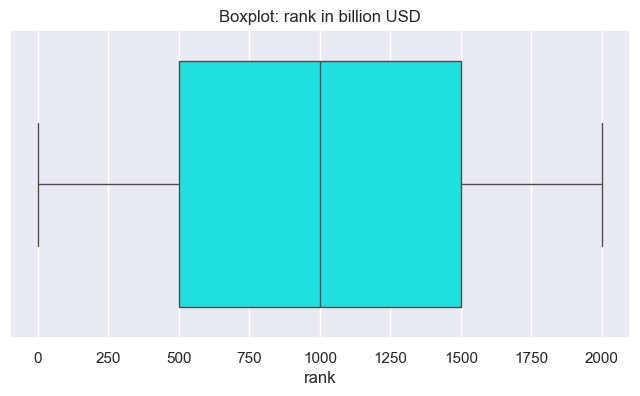

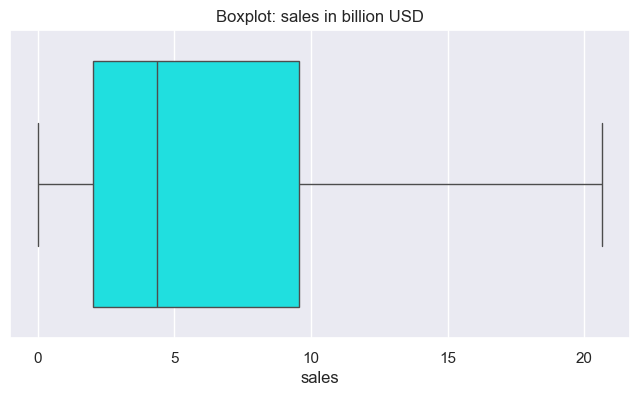

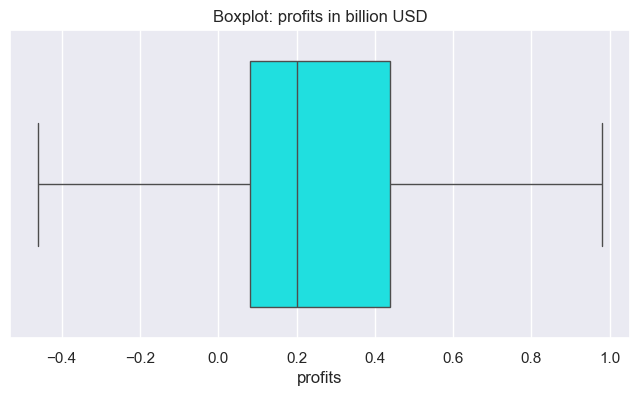

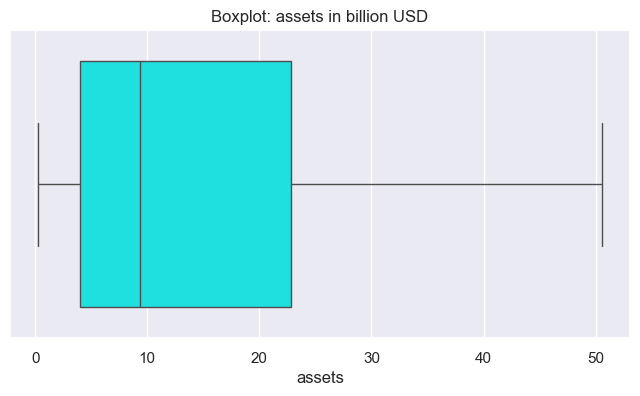

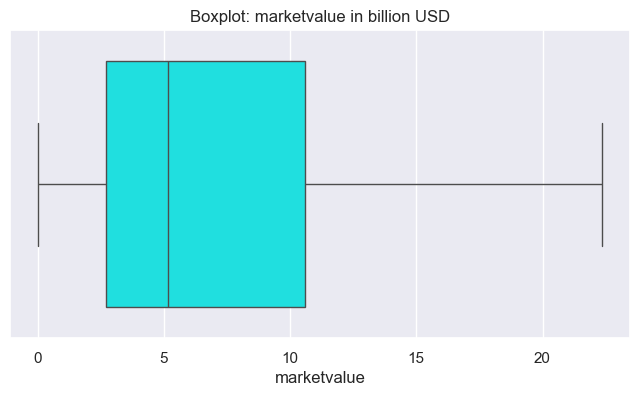

In [15]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

for column in forbes.select_dtypes(include=np.number).columns: ### filtrando o plot somente para variaveis numericas
    plt.figure()
    sns.boxplot(data = forbes , x = column, color='cyan',showfliers=False)
    plt.title("Boxplot: "+column + " in billion USD")

Pelos box plots podemos ver a grande concentracao de empresas com:
- Vendas proximas a 2-9 bilhoes
- Lucro oscilando proximo a 0 (0.1 a 0.5 bilhoes) com valores positivos e negativos nas caldas,
- Asssets (ativos) de 5 a 25 bilhoes
- Valor de mercado proximo a 3 - 11 bilhoes

Vamos agora analisar os outliers encontrados!!

### Outliers das variáveis

#### 1. Metodo do Z score:
O método z-score utiliza como referencia a quantos desvios padrões a informação está da média

 Se Z-score > 3  desvios padroes geralmente se pode considerar um outlier.

In [16]:
import pandas as pd
import numpy as np
from scipy import stats ### pacote de estatística que contem a funcao z-score

In [17]:
def find_outlier_zscore(dataset, threshold, colname):
  ### funcao que calcula a quantidade de outliers encontrados dado o nome do dataframe, o threshold e o nome da coluna
    df = dataset[colname]
    outliers = []
    zscore = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
    print("o número de outliers encontrado em {} foi de: ".format(colname),len(outliers))
    return zscore, outliers

o número de outliers encontrado em rank foi de:  0
o número de outliers encontrado em sales foi de:  35
o número de outliers encontrado em profits foi de:  38
o número de outliers encontrado em assets foi de:  38
o número de outliers encontrado em marketvalue foi de:  36


<Figure size 1000x500 with 0 Axes>

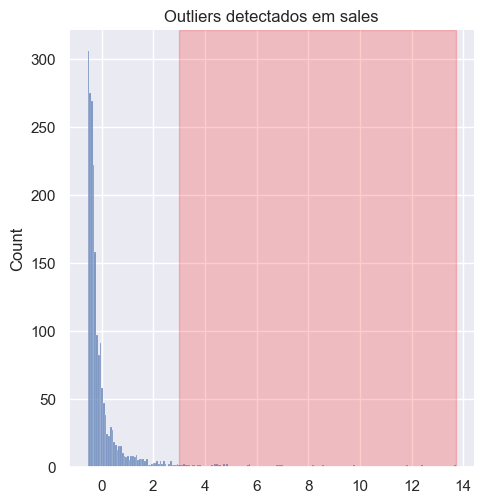

<Figure size 1000x500 with 0 Axes>

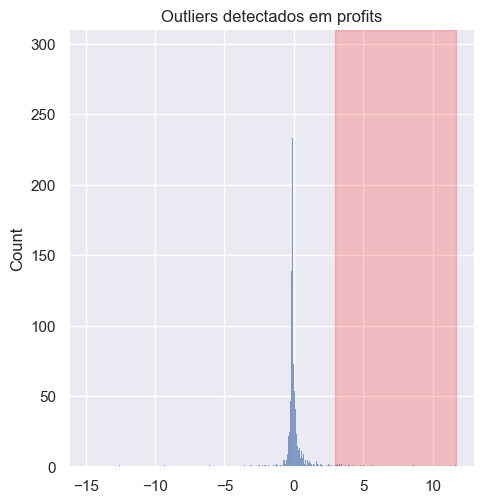

<Figure size 1000x500 with 0 Axes>

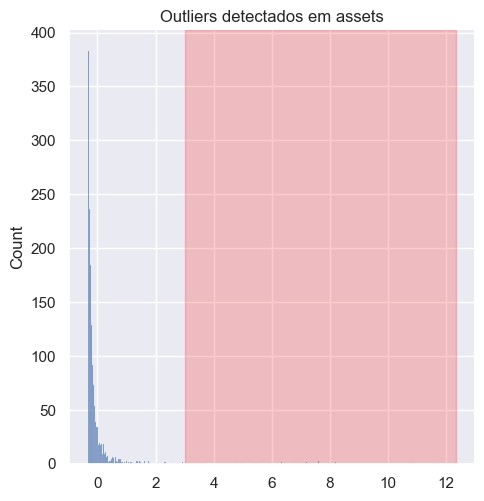

<Figure size 1000x500 with 0 Axes>

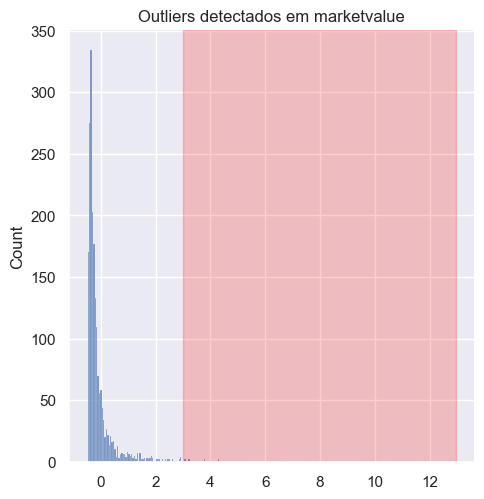

In [18]:
for column in forbes.select_dtypes(include=np.number).columns:
  zscore, out =  find_outlier_zscore(forbes, 3, column)
  if len(out) > 0:
    plt.figure(figsize = (10,5))
    sns.displot(zscore)
    plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

pelo grafico acima fica mais facil visualizar os valores outliers para cada nivel de z-score.

Vemos que para z-score = 3, valores considerados outliers estao nas caldas dos histogramas , em vermelho

#### Removendo outliers com o método z-score
1. Replace outliers with mean

In [19]:
def replace_na_outlier_zscore(dataset, threshold, colname):
  ### funcao que faz um replace para NaN (valor nulo) caso seja encontrado um outlier
    df = dataset[colname]
    outliers = []
    zscore = []
    val = [] #valor
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
          val.append(np.nan)
      else:
          val.append(i)

    return val

In [20]:
def drop_outliers(dataset, threshold):
  ### vamos utilizar a funcao drop NA para remover outliers
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.dropna()

In [21]:
def replace_median_outliers(dataset, threshold):
  ### vamos utilizar a funcao fillna para trocar os NaNs pela mediana
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.fillna(dataset.median())

In [22]:
forbes_zscore_na = drop_outliers(forbes, 3)
forbes_zscore_na

,rank,name,country,category,sales,profits,assets,marketvalue
37,37,ENI,Italy,Oil & gas operations,53.29,4.82,67.91,76.13
42,42,Time Warner,United States,Media,38.08,2.65,121.78,77.95
50,50,American Express,United States,Diversified financials,24.17,3.00,175.00,68.89
51,51,Nissan Motor,Japan,Consumer durables,57.77,4.19,60.56,41.71
52,52,Bank One,United States,Banking,21.04,3.40,290.01,58.38
...,...,...,...,...,...,...,...,...
1996,1996,Siam City Bank,Thailand,Banking,0.48,0.02,11.27,1.47
1997,1997,Yokogawa Electric,Japan,Business services & supplies,2.78,-0.22,2.96,3.29
1998,1998,Hindalco Industries,India,Materials,1.35,0.14,2.47,2.76
1999,1999,Nexans,France,Capital goods,5.09,0.00,2.71,0.88


In [ ]:
forbes_zscore_median = replace_median_outliers(forbes, 3)

#### 2. Metodo do IQR :
O método IQR (distância inter-quartil em inglês) ve a distancia da amplitude dos quartis:

In [24]:
forbes = data('Forbes2000')

In [25]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('O numero de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

 IQR é  999.5
O numero de outliers encontrado foi de 0
 IQR é  7.529999999999999
O numero de outliers encontrado foi de 212
 IQR é  nan
O numero de outliers encontrado foi de 0
 IQR é  18.7675
O numero de outliers encontrado foi de 222
 IQR é  7.8824999999999985
O numero de outliers encontrado foi de 217


<Figure size 1000x600 with 0 Axes>

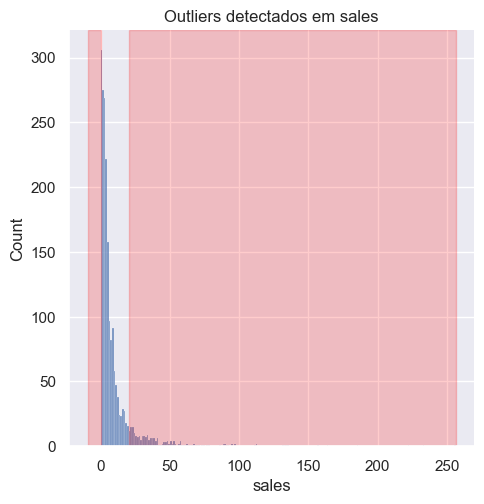

<Figure size 1000x600 with 0 Axes>

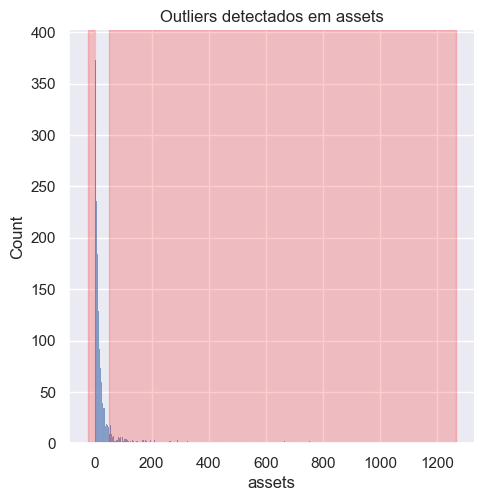

<Figure size 1000x600 with 0 Axes>

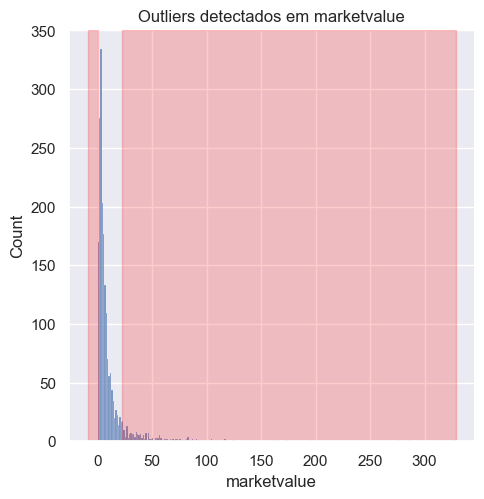

In [26]:
for column in forbes.select_dtypes(include=np.number).columns:
  lower, upper, out =  find_outlier_iqr(forbes, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(forbes[column], kde=False)
    plt.axvspan(xmin = lower,xmax= forbes[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= forbes[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))

# Análise de Missing Values (dados faltantes)

1. Vamos verificar a soma de dados faltandes para dada uma das colunas do dataframe:

In [27]:
forbes.isna().sum()

rank           0
name           0
country        0
category       0
sales          0
profits        5
assets         0
marketvalue    0
dtype: int64

In [28]:
import missingno as msno ### pacote com visualizacoes de dados faltantes

<Axes: >

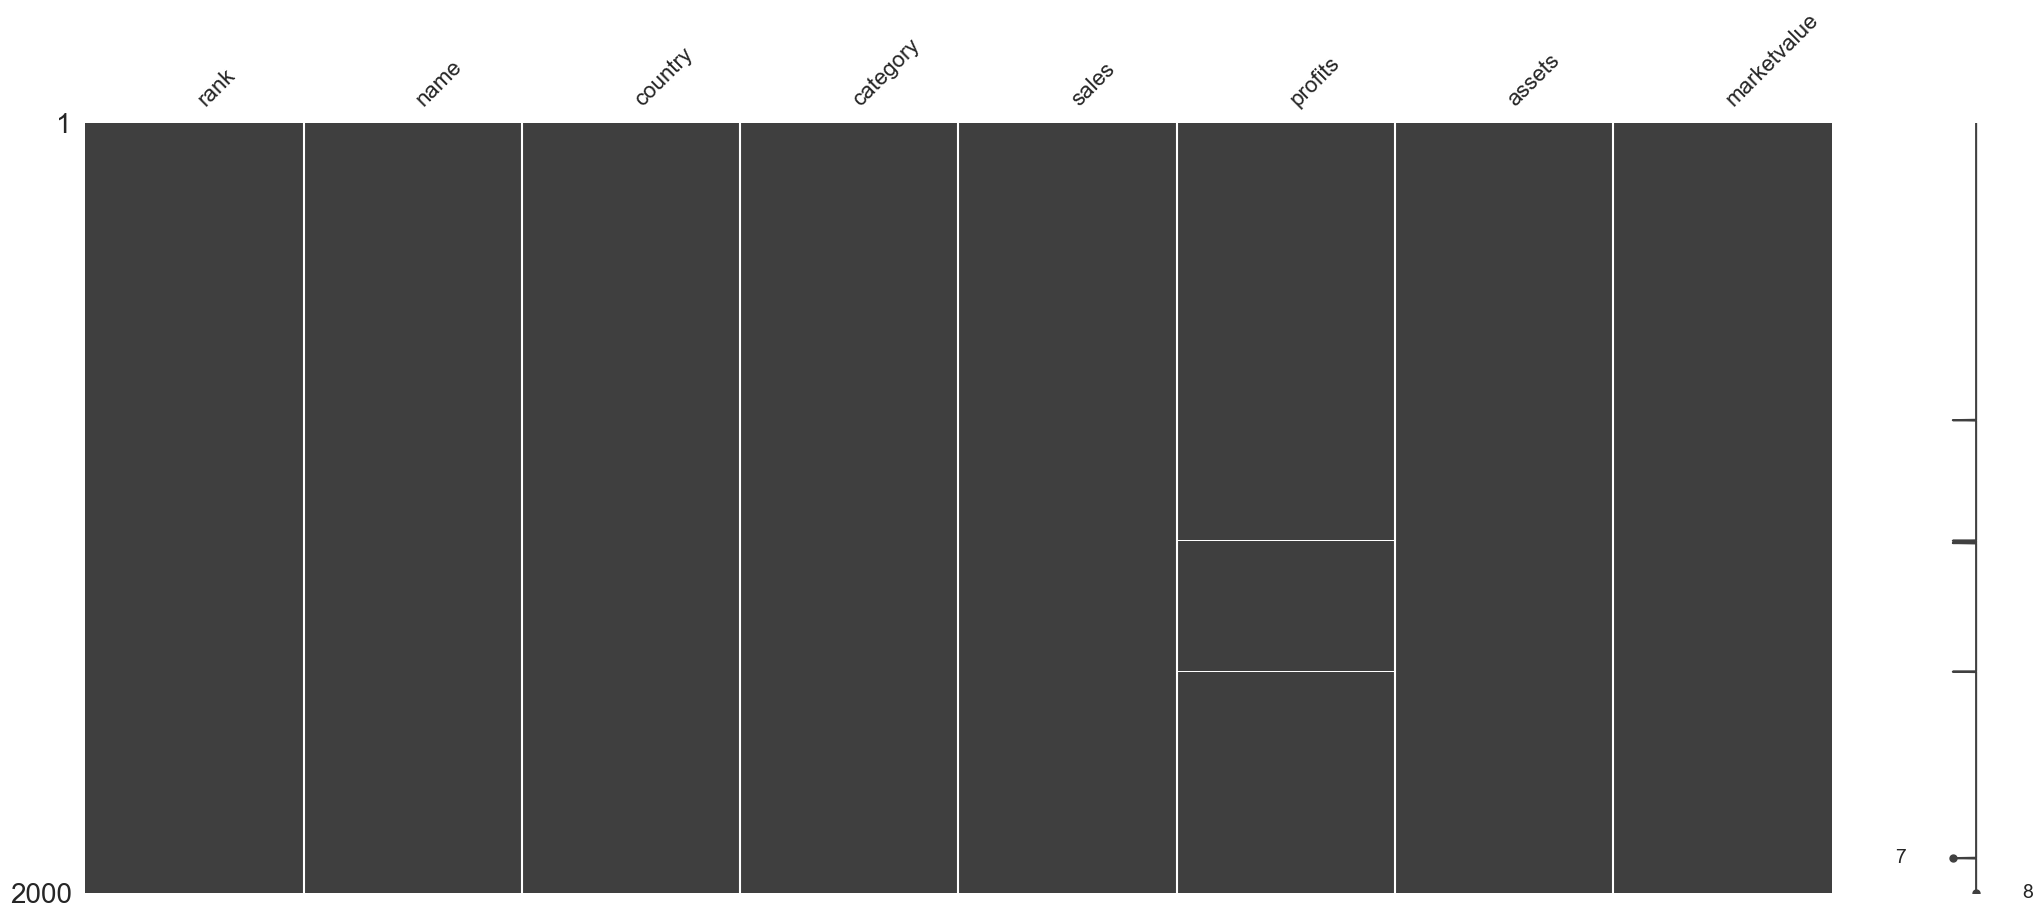

In [29]:
msno.matrix(forbes) ## essa visualizacao nos da uma ideia da completude dos dados faltantes

atençao: isna() é o mesmo que isnull(), no pandas


In [30]:
### vamos construir uma tabela com o % de valores faltantes de cada variável abaixo

missing = forbes.isna().sum()

missing_perc = 100 * forbes.isna().sum() / len(forbes)

mis_val_table = pd.concat([missing, missing_perc], axis=1)

mis_val_table = mis_val_table.rename(columns = {0 : '# Count: valores nulos', 1 : '% do Total'})

mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values(
        '% do Total', ascending=False).round(1)

print ("O dataframe contém " + str(forbes.shape[1]) + " colunas.\n"
            "Contendo " + str(mis_val_table.shape[0]) +
              " colunas com valores faltantes.")

mis_val_table

O dataframe contém 8 colunas.
Contendo 1 colunas com valores faltantes.


,# Count: valores nulos,% do Total
profits,5,0.2


# EDA AUTOMATIZADA

Existem 2 pacotes famosos no mundo da analise de dados que fazem analises exploratorias automatizadas:
1. Pandas profiling -> chamado atualmente de ydataprofiling
2. Sweetviz

Ambas geram relatorios html prontos para analises / interpretacoes do analista

In [ ]:
import sweetviz as sv

my_report = sv.analyze(forbes) ### le os dados e cria uma report

In [ ]:
my_report.show_notebook() ### para ver o html no notebook

In [ ]:
my_report.show_html(  filepath='./SWEETVIZ_REPORT.html',
            open_browser=True,
            layout='widescreen',
            scale=None)
#### gera o html e salva no seu diretorio local